<center><img src="images/Logo_I2A2.webp", width=250></center>  

# Desafio 4

### Estamos em 2012!  

Você deve construir um **modelo preditivo de previsão da demanda de passageiros** de uma linha de Metrô, visto que, desde 2005, a demanda vem crescendo constantemente e a alta direção da empresa necessita de subsidios para a tomada de decisão do momento de investimento de forma a aumentar a capacidade operacional da linha que hoje é de cerca de 72 mil passageiros/hora sentido.

<center><img src="images/DemandaMetro.png", width=900></center>  

O modelo deve possuir como variáveis preditoras indicadores econômicos que possuam projeções que possam ser encontradas facilmente na mídia especializada.     
O arquivo [DemandaMetro.xlsx](https://github.com/vsvasconcelos/i2a2/blob/main/DemandaMetro.xlsx) possui as totalizações mensais de entrada de passageiros, bem como as respectivas médias em dias úteis (DU).

### Pacotes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Entrega: 28/07/2022 (Quinta)

In [56]:
dados = pd.read_excel('DemandaMetro.xlsx')[3:]
dados.columns = ['Data', 'Total', 'Média (DU)']
dados.reset_index(drop=True, inplace=True)

In [57]:
indexes_anos = np.arange(12, len(dados), 13)

In [58]:
dados_anuais = dados.iloc[indexes_anos]
dados_anuais.reset_index(drop=True, inplace=True)
dados = dados.drop(indexes_anos).reset_index(drop=True)

In [65]:
dados['Data'] =  pd.to_datetime(dados['Data'], format='%yyyy-%mm-%dd %HH:%mm:%ss')

In [66]:
dados_anuais.head(5)

,Data,Total,Média (DU)
0,1989,235266279,775420
1,1990,233591270,778267
2,1991,239535443,800848
3,1992,221281279,745112
4,1993,210627855,714562


In [67]:
dados.head(10)

,Data,Total,Média (DU)
0,1989-01-01,17582640,685614
1,1989-02-01,16054636,724491
2,1989-03-01,19435854,770336
3,1989-04-01,19288983,786977
4,1989-05-01,20399772,800986
5,1989-06-01,20543714,785930
6,1989-07-01,19491708,747304
7,1989-08-01,21369032,788212
8,1989-09-01,19771308,799492
9,1989-10-01,20823461,806657


Após a proposição do modelo, realize a previsão de demanda de passageiros até **2022**.

### Análise dos dados

In [9]:
print(f'Conjunto de dados:\n Linhas:{dados.shape[0]}\n Colunas:{dados.shape[1]}')

Conjunto de dados:
 Linhas:328
 Colunas:3


In [68]:
x = dados['Data']
y = dados['Total']

In [106]:
import matplotlib.dates as mdates

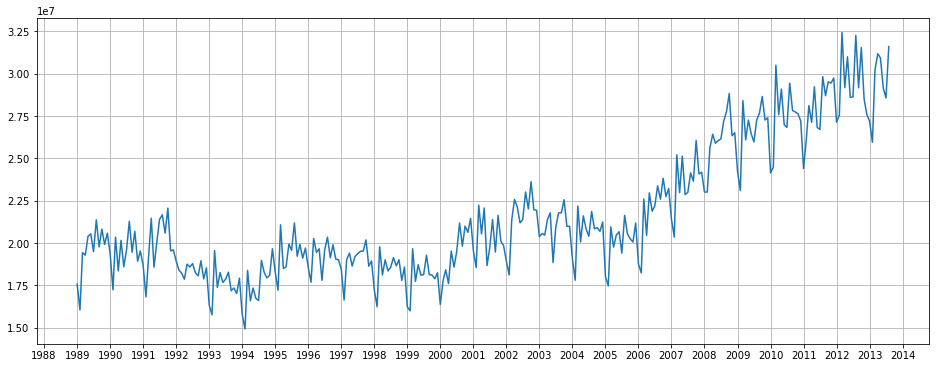

In [112]:
plt.figure(figsize=(16,6))
plt.plot(x, y)
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [234]:
gasolina = pd.read_excel('mensal-estados-2001-a-2012.xlsx')
gasolina.columns = gasolina.iloc[11].values
gasolina = gasolina[12:].reset_index(drop=True)

In [235]:
gasolina_2 = pd.read_excel('mensal-estados-desde-jan2013.xlsx')
gasolina_2.columns = gasolina.columns
gasolina_2 = gasolina_2[16:].reset_index(drop=True)

In [237]:
gasolina_3 = pd.read_excel('mensal-estados-1999-a-2001.xlsx').sort_values(by='MÊS')

In [238]:
gasolina = gasolina[(gasolina['PRODUTO']=='GASOLINA COMUM') & (gasolina['ESTADO']=='SAO PAULO')][['MÊS', 'PRECO MÉDIO REVENDA']].reset_index(drop=True)
gasolina_2 = gasolina_2[(gasolina_2['PRODUTO']=='GASOLINA COMUM') & (gasolina_2['ESTADO']=='SAO PAULO')][['MÊS','PRECO MÉDIO REVENDA']].reset_index(drop=True)

In [239]:
gasolina = pd.concat([gasolina_3, gasolina, gasolina_2],axis=0).reset_index(drop=True)
gasolina.columns = ['Data', 'Valor']

In [240]:
gasolina['Data'] = pd.to_datetime(gasolina['Data'], format='%yyyy-%mm-%dd %HH:%mm:%ss')

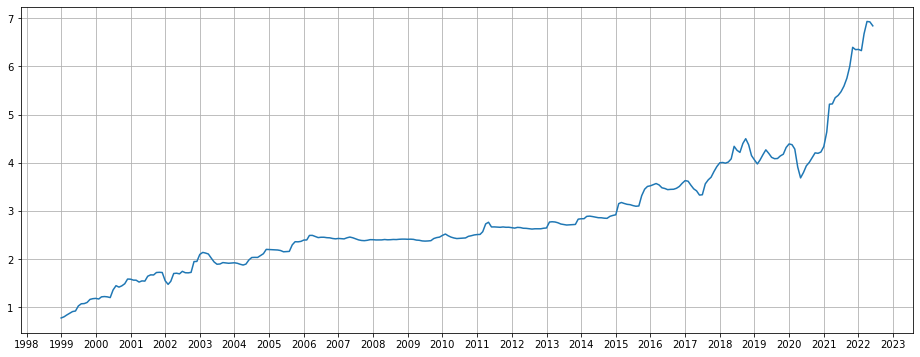

In [242]:
plt.figure(figsize=(16,6))
plt.plot(gasolina['Data'], gasolina['Valor'])
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [299]:
salario = pd.read_excel('salario.xlsx')

In [302]:
salario['Data'].iloc[0]

Timestamp('1994-03-01 00:00:00')

In [306]:
date_range = pd.date_range(salario['Data'].iloc[0], salario['Data'].iloc[-1],freq='MS')

In [335]:
salario = pd.merge(pd.DataFrame(date_range, columns=['Data']), salario,how='left').fillna(method='ffill')

In [336]:
salario

,Data,Salario
0,1994-03-01,64.79
1,1994-04-01,64.79
2,1994-05-01,64.79
3,1994-06-01,64.79
4,1994-07-01,64.79
...,...,...
330,2021-09-01,1100.00
331,2021-10-01,1100.00
332,2021-11-01,1100.00
333,2021-12-01,1100.00


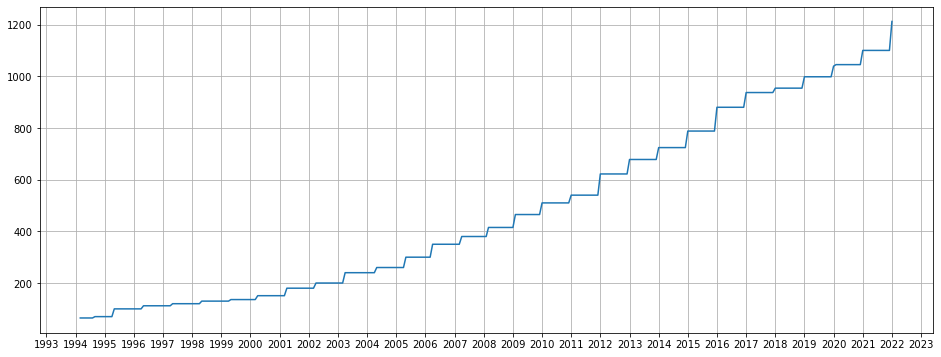

In [338]:
plt.figure(figsize=(16,6))
plt.plot(salario['Data'], salario['Salario'])
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

### Insights dos Colegas

Salário Mínimo <br>
Número de Veículos no país <br>
Valor da passagem do metro <br>
Dias da semana <br>
Feriados <br>
IGP-M <br>
PIB https://repositorio.seade.gov.br/dataset/pib-mensal<br>
Valor da Gasolina https://www.tabelasdefrete.com.br/planilha/historico-da-variacao-de-precos/25 <br> 
Valor da Gasolina 2 https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis/serie-historica-do-levantamento-de-precos <br>
Crescimento populacional <br>


Fuzzy Time Series
https://www.researchgate.net/publication/356898077_Prediction_of_passenger_train_using_fuzzy_time_series_and_percentage_change_methods

### Dicas do Celso / Vagner

Prophet é uma biblioteca para análise e previsão de séries temporais univariadas baseada em métodos estatísticos.
Contudo, ela tem vários dispositivos para melhorar a análise, inclusive, podendo ter o calendário customizado para suportar feriados e datas comemorativas.

https://facebook.github.io/prophet/

Neural Prophet (https://neuralprophet.com/html/index.html)

DeepAR (https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html

LSTM

XGBoost

https://pt.wikipedia.org/wiki/Ci%C3%AAncia_de_dados

https://pt.wikipedia.org/wiki/M%C3%A9todo_cient%C3%ADfico

Validação Cruzada (K-Folding) vs Train Test Split

Apenas lembrando que quanto mais nos distanciamos no futuro, maior é a chance de erro.
Outra questão importante, para quem estiver usando modelos baseados em autoregressores, o lag é um fator fundamental.